In [ ]:
!pip install tensorflow 

In [ ]:
import tensorflow as tf

In [29]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler

In [30]:
data_train = pd.read_csv('Hyderabad_Power_Train.csv')
# data_test = pd.read_csv('Hyderabad_Power_Test.csv')

data_train.rename(columns = {'Wind Speed':'WindSpeed'}, inplace = True)
data_train.rename(columns = {'diffuse flows':'diffuseflows'}, inplace = True)
data_train.rename(columns = {'general diffuse flows':'generaldiffuseflows'}, inplace = True)

In [31]:
# sns.pairplot(data_train);

In [32]:
# data_train.corr().style.background_gradient(cmap='coolwarm')

# Temperature

19.303899333667694
0


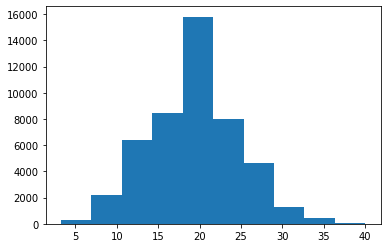

In [33]:
mean_value=data_train['Temperature'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['Temperature'].fillna(mean_value, inplace=True)
print(data_train['Temperature'].isna().sum())

plt.hist(data_train['Temperature'])
plt.show()

# Humidity

68.16809844265092
0


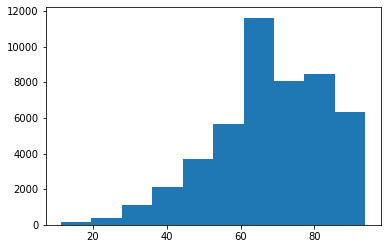

In [34]:
mean_value=data_train['Humidity'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['Humidity'].fillna(mean_value, inplace=True)
print(data_train['Humidity'].isna().sum())

plt.hist(data_train['Humidity'])
plt.show()

# Wind Speed

0.087
0


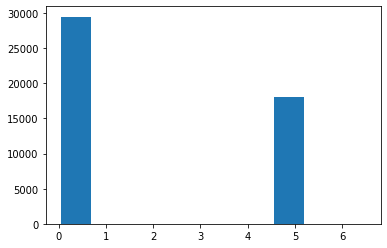

In [35]:
median_value=data_train['WindSpeed'].dropna().median()
print(median_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['WindSpeed'].fillna(median_value, inplace=True)
print(data_train['WindSpeed'].isna().sum())

plt.hist(data_train['WindSpeed'])
plt.show()

# general diffuse flows

190.41577788903987
0


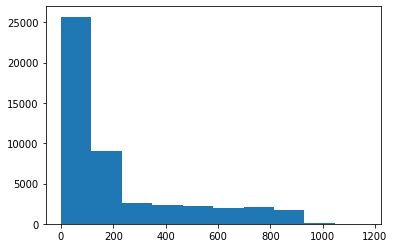

In [36]:
mean_value=data_train['generaldiffuseflows'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['generaldiffuseflows'].fillna(mean_value, inplace=True)
print(data_train['generaldiffuseflows'].isna().sum())

plt.hist(data_train['generaldiffuseflows'])
plt.show()

# Diffuse flows

78.40013444934326
0


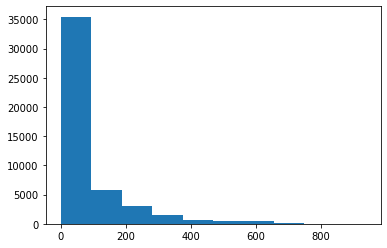

In [37]:
mean_value=data_train['diffuseflows'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['diffuseflows'].fillna(mean_value, inplace=True)
print(data_train['diffuseflows'].isna().sum())

plt.hist(data_train['diffuseflows'])
plt.show()

In [38]:
X = data_train.iloc[:, 1:6]
y = data_train.iloc[:, 6]

In [39]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape
# print(list(X_train))
# print(list(y_train))

(31889, 5)

In [40]:
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

# scaler_model.fit(X_eval)

X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [41]:
# data_train.corr().style.background_gradient(cmap='coolwarm')

In [42]:
feat_cols=[]
for cols in data_train.columns[1:6]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

[NumericColumn(key='Temperature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Humidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='WindSpeed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='generaldiffuseflows', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='diffuseflows', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [43]:
# model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

In [44]:
model=tf.estimator.DNNRegressor(hidden_units=[256,512,256],feature_columns=feat_cols)

In [ ]:
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=100000,shuffle=True)    #100000
model.train(input_fn=input_func,steps=100000)

train_metrics=model.evaluate(input_fn=input_func,steps=100000)

In [ ]:
pred_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_eval,y=y_eval,batch_size=30,num_epochs=1,shuffle=False)#30
preds=model.predict(input_fn=pred_input_func)

In [ ]:
predictions=list(preds)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])
    
test_metric=model.evaluate(input_fn=pred_input_func,steps=100000)


In [ ]:
print(test_metric)

#print(mean_squared_error(y_eval, final_pred))
# print(mean_absolute_percentage_error(y_eval, final_pred))
# explained_variance_score(y_eval, final_pred)

In [ ]:
#from tensorflow_core.estimator import inputs

# scaler_model = MinMaxScaler()
# scaler_model.fit(X_train)

# X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

# scaler_model.fit(X_eval)

# X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

#Creating Feature Columns
feat_cols=[]
for cols in data_train.columns[:-1]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

#the input function
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

#Training the model
model.train(input_fn=input_func,steps=1000)

#Evaluating the model
train_metrics=model.evaluate(input_fn=input_func,steps=1000)

#Now to predict values we do the following
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_eval,y=y_eval,batch_size=10,num_epochs=1,shuffle=False)
preds=model.predict(input_fn=pred_input_func)

predictions=list(preds)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])
    
test_metric=model.evaluate(input_fn=pred_input_func,steps=1000)

mean_squared_error(y_eval, final_pred, multioutput=[0.3, 0.7])


**MAPE performance score is : 3.15**
